In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_size=512

train_set = 'F:/C_D_W/train'
valid_set = 'F:/C_D_W/val'

data_aug = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255,input_shape=(img_size,img_size,3)),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
   # tf.keras.layers.experimental.preprocessing.RandomWidth(0.1),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1)
])

data_aug_test= tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255)
    ])

In [3]:
train = tf.keras.preprocessing.image_dataset_from_directory(train_set, image_size=(img_size,img_size),batch_size=64)
class_names = train.class_names
num_classes = len(train.class_names)
train = train.map(lambda x,y:(data_aug(x,training=True),y),num_parallel_calls=12).prefetch(tf.data.AUTOTUNE)

Found 14630 files belonging to 3 classes.


In [5]:
valid = tf.keras.preprocessing.image_dataset_from_directory(valid_set, image_size=(img_size,img_size),batch_size=64,subset='training',seed=52,validation_split=0.4)
valid = valid.map(lambda x,y:(data_aug_test(x,training=True),y),num_parallel_calls=12).prefetch(tf.data.AUTOTUNE)

Found 1500 files belonging to 3 classes.
Using 900 files for training.


In [6]:
test = tf.keras.preprocessing.image_dataset_from_directory(valid_set, image_size=(img_size,img_size),batch_size=64,subset='validation',seed=52,validation_split=0.4)
test = test.map(lambda x,y:(data_aug_test(x,training=True),y),num_parallel_calls=12).prefetch(tf.data.AUTOTUNE)

Found 1500 files belonging to 3 classes.
Using 600 files for validation.


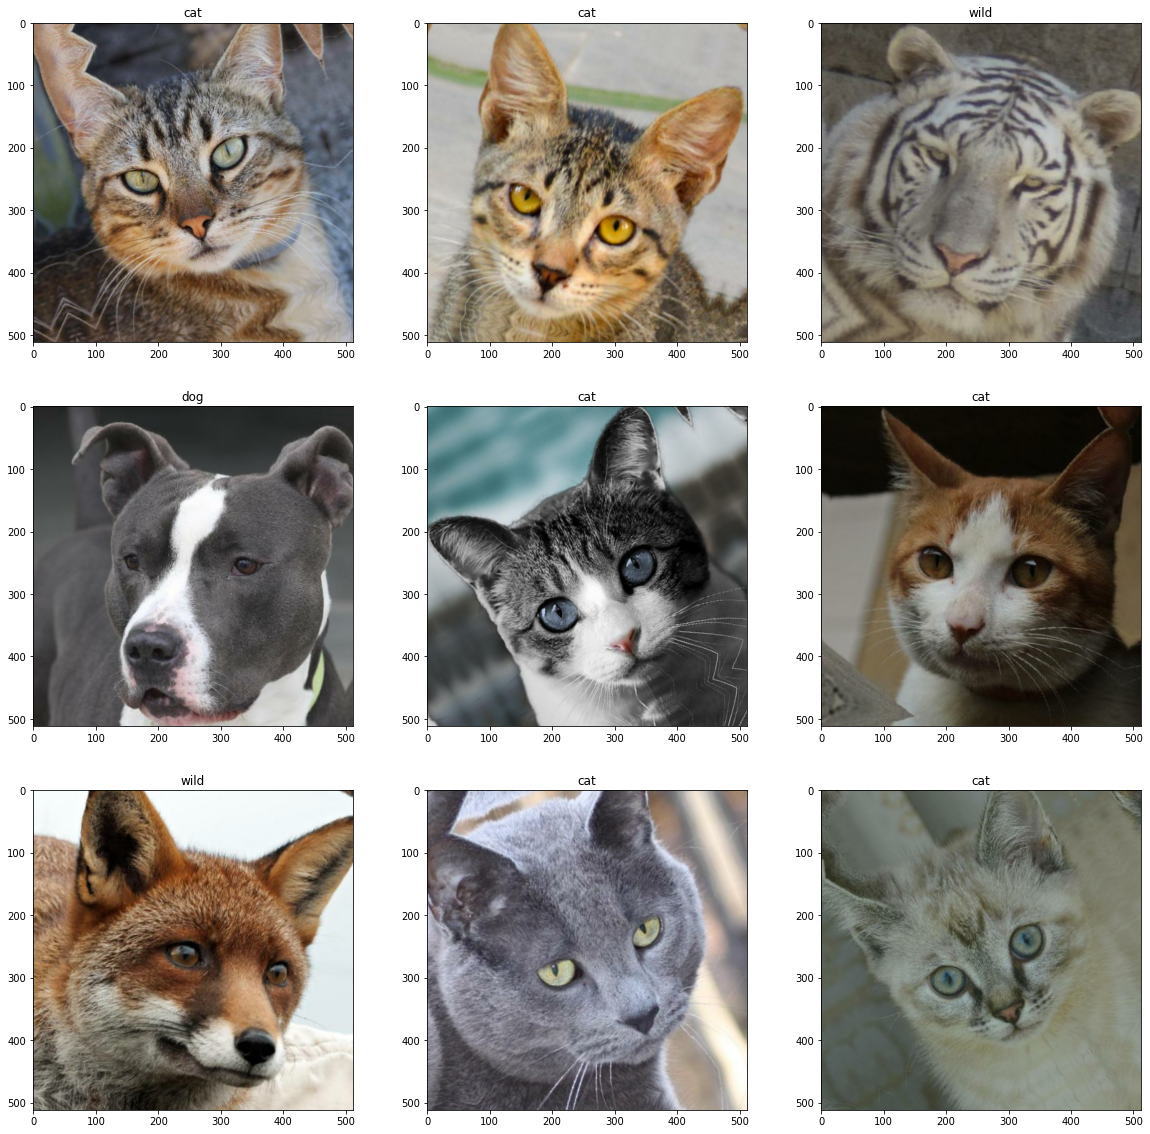

In [7]:
plt.figure(figsize=(20,20))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[labels[i]])

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128,2,2,padding='same',activation='relu',input_shape=(img_size,img_size,3)),
    tf.keras.layers.Conv2D(256,2,2,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(256,2,2,padding='same',activation='relu'),
    tf.keras.layers.Conv2D(256,2,2,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(512,2,2,padding='same',activation='relu'),
    tf.keras.layers.Conv2D(512,2,2,padding='same',activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes,activation='softmax')
])

In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 128)     1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 256)     131328    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 256)       262400    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 256)       262400    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 512)        

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [12]:
history = model.fit(train,epochs=8,validation_data=valid)

Epoch 1/8
229/229 [==============================] - 67s 280ms/step - loss: 0.8114 - accuracy: 0.6044 - val_loss: 0.6728 - val_accuracy: 0.7422
Epoch 2/8
229/229 [==============================] - 66s 274ms/step - loss: 0.3809 - accuracy: 0.8480 - val_loss: 0.2823 - val_accuracy: 0.8911
Epoch 3/8
229/229 [==============================] - 66s 273ms/step - loss: 0.2576 - accuracy: 0.9029 - val_loss: 0.2888 - val_accuracy: 0.8800
Epoch 4/8
229/229 [==============================] - 66s 275ms/step - loss: 0.2117 - accuracy: 0.9204 - val_loss: 0.1721 - val_accuracy: 0.9256
Epoch 5/8
229/229 [==============================] - 66s 273ms/step - loss: 0.1799 - accuracy: 0.9324 - val_loss: 0.1502 - val_accuracy: 0.9478
Epoch 6/8
229/229 [==============================] - 66s 275ms/step - loss: 0.1582 - accuracy: 0.9425 - val_loss: 0.1260 - val_accuracy: 0.9500
Epoch 7/8
229/229 [==============================] - 64s 268ms/step - loss: 0.1490 - accuracy: 0.9435 - val_loss: 0.1260 - val_accuracy:

In [13]:
model.evaluate(test)

10/10 [==============================] - 1s 122ms/step - loss: 0.2247 - accuracy: 0.9150


[0.22474738955497742, 0.9150000214576721]